<a href="https://colab.research.google.com/github/DmitryKostin/tinkoff-industry-data-analysis/blob/main/05_hypothesis_testing/hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проверка гипотез

**Содержание** <a class='anchor' id='table_of_contents'></a>

- [Задание 1](#task_1)
- [Задание 2](#task_2)
- [Задание 3](#task_3)
- [Моделирование распределения p-value](#modeling)

## Задание 1 <a class='anchor' id='task_1'></a>

**Условие**

Мы хотим попробовать увеличить конверсию на обзвонах путём разработки нового скрипта. Нам интересно узнать, может ли вырасти конверсия из-за нового скрипта. Составьте критерий с уровнем значимости 0.04, который позволит по данным теста принять решение о внедрении нового скрипта.

**Входные данные**

Четыре целых числа: количество продаж на контроле, количество заявок на контроле, количество продаж на тесте и количество заявок на тесте.

**Возвращаемое значение**

bool-значение, ответ на вопрос: "Отклонить ли гипотезу?".

### Решение

В этом тесте нас интересует только лучшая работа нового скрипта, чем старого. 

Здесь
$$H_{0}: p_{c} \geq p_{t}$$
$$H_{1}: p_{c} < p_{t}$$

где $p_{c}$ - конверсия на контроле, $p_{t}$ - конверсия на тесте.

Для проверки гипотезы равенства конверсией воспользуемся $Z$-тестом.

In [1]:
import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest

chat_id = 944932368

def solution(x_success: int, 
             x_cnt: int, 
             y_success: int, 
             y_cnt: int) -> bool:
    
    alpha = 0.04

    counts = np.array([x_success, y_success])
    nobs = np.array([x_cnt, y_cnt])
    stat, pval = proportions_ztest(counts, nobs, alternative = 'smaller')
    
    return pval < alpha

## Задание 2 <a class='anchor' id='task_2'></a>

**Условие**

Перед проведением теста вы хотите убедиться в том, что рандомизатор будет работать корректно, а именно, что сегментатор разбивает выборку на тест и контроль таким образом, что распределения параметра $F$ на тесте и контроле совпадают.

К задаче приложены 4 файла. В каждом файле каждая строка является выборкой, количество строк в каждом файле одинаково. В первом файле данные из исторического распределения, а в остальных файлах данные, измененные разными способами.

Ваша задача выбрать **один критерий**, который позволял бы отличать выборку из исторических данных от выборки из любого другого распределения.

Уровень значимости критерия $\alpha = 0.05$.

**Входные данные**

Две выборки параметра $F$.

**Возвращаемое значение**

bool-значение, ответ на вопрос: "Отклонить ли гипотезу однородности выборок?" на заданном уровне значимости.

### Решение

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import anderson_ksamp

chat_id = 944932368

def solution(x: np.array, y: np.array) -> bool:
    alpha = 0.05
    return anderson_ksamp([x, y]).pvalue < alpha

## Задание 3 <a class='anchor' id='task_3'></a>

**Условие**

Мы хотим запустить новую подписку для клиентов с целью увеличения их лояльности. Наша цель - не терять на подписке более 300 рублей в месяц.

Имея исторические данные о затратах на аналогичную подписку, постройте критерий, согласно которому можно будет определить, что затраты на подписку статзначимо меньше установленного порога. Уровень значимости критерия $\alpha$ = 0.08.

**Входные данные**

Одна выборка: исторические данные по затратам на аналогичную подписку.

**Возвращаемое значение**

bool-значение, ответ на вопрос: "Отклонить ли нулевую гипотезу?" на заданном уровне значимости.

### Решение

Выберем одновыборочный критерий - $Z$-тест.

In [3]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import ztest

chat_id = 944932368

def solution(x: np.array) -> bool: 
    alpha = 0.08
    pvalue = ztest(x, value=300, alternative='smaller')[1]
    return pvalue < alpha 

## Моделирование распределения p-value <a class='anchor' id='modeling'></a>

In [4]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import warnings

from hyppo.ksample import Energy, MMD, DISCO
from scipy.stats import laplace, norm, ks_2samp, anderson_ksamp, cramervonmises_2samp
from statsmodels.stats.weightstats import ztest
from statsmodels.distributions.empirical_distribution import ECDF

warnings.filterwarnings("ignore")
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [5]:
historical_data = pd.read_csv("historical_data.csv") 
modified_data_of_type_1 = pd.read_csv("modified_data_of_type_1.csv")
modified_data_of_type_2 = pd.read_csv("modified_data_of_type_2.csv")
modified_data_of_type_3 = pd.read_csv("modified_data_of_type_3.csv")

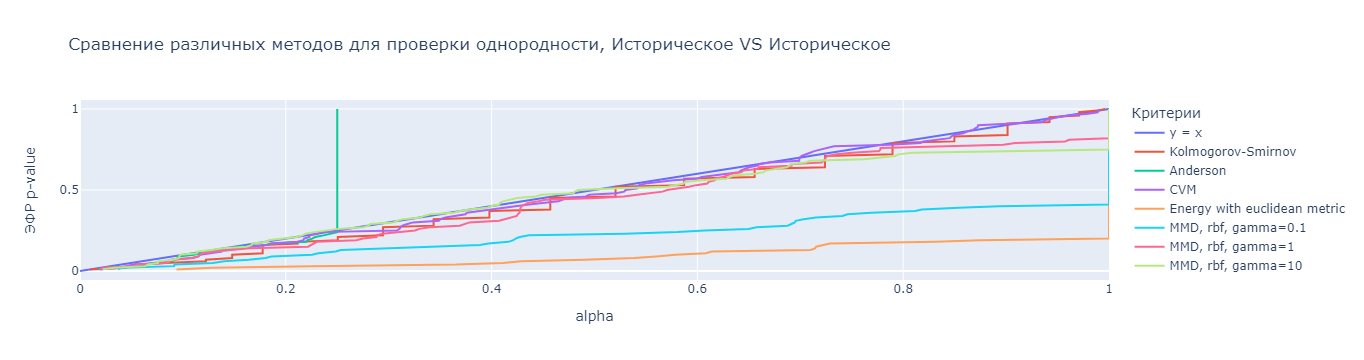

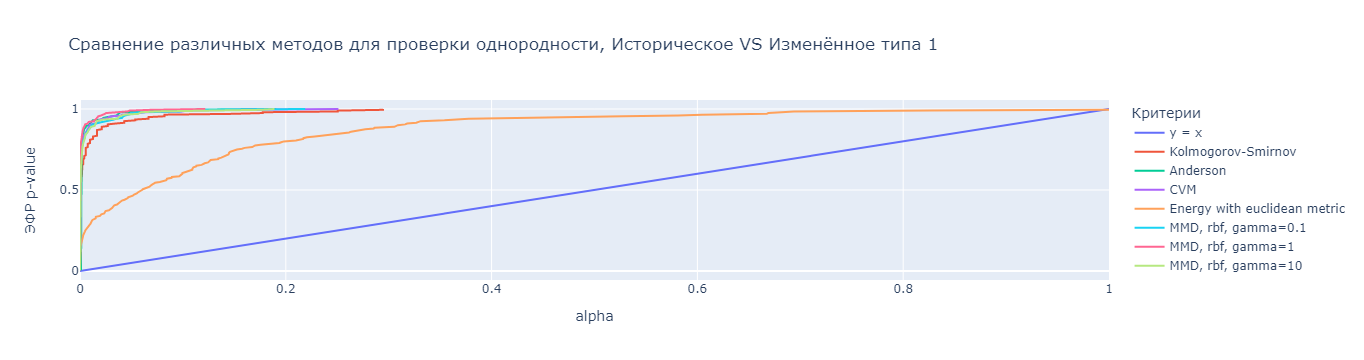

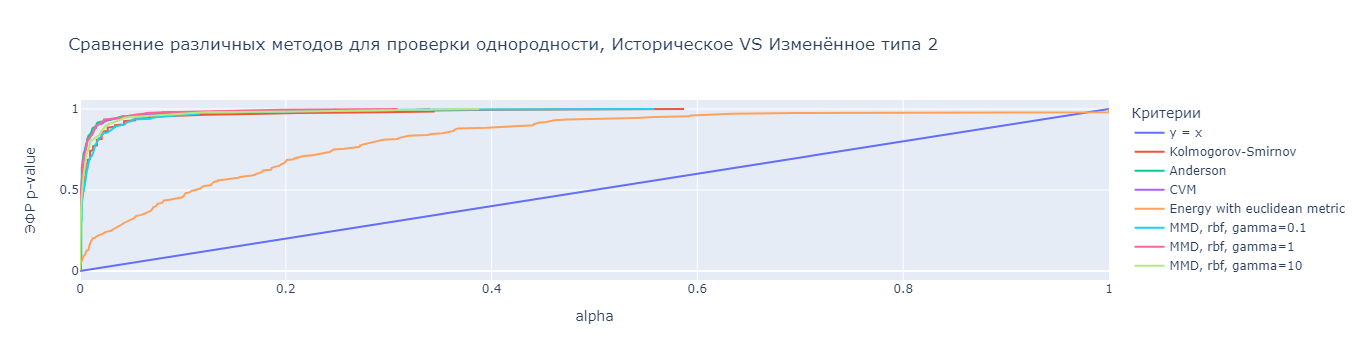

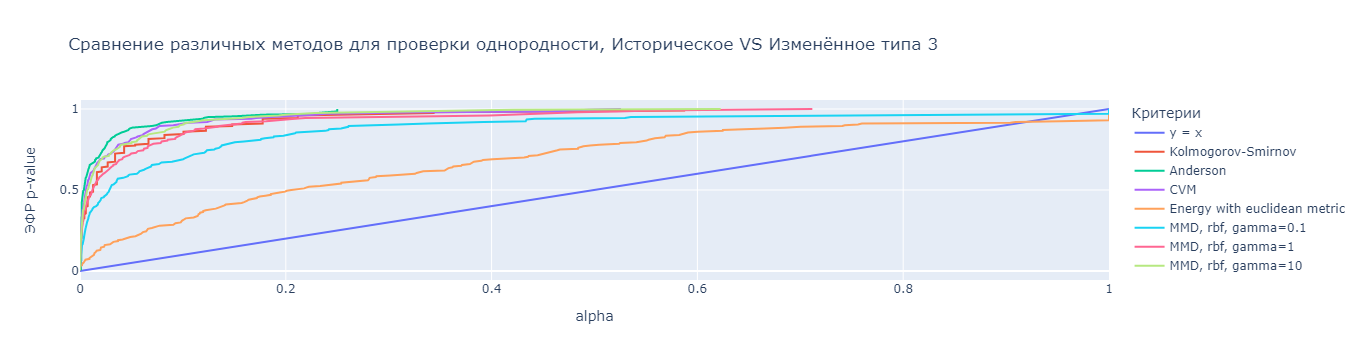

In [6]:
data_list = [{
    "x": historical_data[::2],
    "y": historical_data[1::2],
    "dist_desc": "Историческое VS Историческое"
}, {
    "x": historical_data,
    "y": modified_data_of_type_1,
    "dist_desc": "Историческое VS Изменённое типа 1"
}, {
    "x": historical_data,
    "y": modified_data_of_type_2,
    "dist_desc": "Историческое VS Изменённое типа 2"
}, {
    "x": historical_data,
    "y": modified_data_of_type_3,
    "dist_desc": "Историческое VS Изменённое типа 3"
}]

test_list = [{
    "p_value": lambda x, y: ks_2samp(x, y, alternative="two-sided").pvalue,
    "name": "Kolmogorov-Smirnov"
}, {
    "p_value": lambda x, y: anderson_ksamp([x, y]).pvalue,
    "name": "Anderson"
}, {
    "p_value": lambda x, y: cramervonmises_2samp(x, y).pvalue,
    "name": "CVM"
}, {
    "p_value": lambda x, y: Energy(compute_distance="euclidean").test(x, y)[1],
    "name": "Energy with euclidean metric"
}, {
    "p_value": lambda x, y: MMD(compute_kernel="rbf", gamma=1/10).test(x, y)[1],
    "name": "MMD, rbf, gamma=0.1"
}, {
    "p_value": lambda x, y: MMD(compute_kernel="rbf", gamma=1).test(x, y)[1],
    "name": "MMD, rbf, gamma=1"
}, {
    "p_value": lambda x, y: MMD(compute_kernel="rbf", gamma=10).test(x, y)[1],
    "name": "MMD, rbf, gamma=10"
}]

for data in data_list:
    test_p_value_list = {
        test["name"]: []
        for test in test_list
    }

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=np.linspace(start=0, stop=1, num=1000), 
                             y=np.linspace(start=0, stop=1, num=1000),
                             mode="lines", name="y = x"))

    for i in range(data["x"].shape[0]):
        x = data["x"].iloc[i].to_numpy()
        y = data["y"].iloc[i].to_numpy()
        
        for test in test_list:
            test_p_value_list[test["name"]].append(test["p_value"](x, y))

    for test in test_list:
        p_value_ecdf = ECDF(test_p_value_list[test["name"]])
        fig.add_trace(go.Scatter(x=p_value_ecdf.x, y=p_value_ecdf.y,
                                 mode="lines", name=test["name"]))

    fig.update_layout(title=f"Сравнение различных методов для проверки однородности, {data['dist_desc']}",
                      xaxis_title="alpha",
                      yaxis_title="ЭФР p-value",
                      legend_title="Критерии")
    fig.show()

Смотрим что подходит под критерии из условия,
используя уровень значимости из задачи.
* Для "Историческое VS Историческое" значение графика в точке $\alpha$,
равной уровню значимости, есть вероятность ошибки первого рода.
* Для "Историческое VS Изменённое" значение графика в точке $\alpha$, 
равной уровню значимости, есть мощность
($1 - $ вероятность ошибки второго рода).